In [46]:
from sklearn.datasets import fetch_california_housing

In [47]:
california = fetch_california_housing()

In [48]:
x = california.data
y = california.target

x.shape, y.shape

((20640, 8), (20640,))

In [49]:
from sklearn.model_selection import *
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

In [50]:
x_train.shape, y_train.shape

((16512, 8), (16512,))

In [51]:
max = x_train.max()
x_train = (x_train-x_train.min())/(max-x_train.min())
x_test = (x_test-x_train.min())/(max-x_train.min())

# column 별로 스케일링을 따로 할 필요가 있음
x_train.max(), x_train.min()

(1.0, 0.0)

In [52]:
x[1].shape

(8,)

In [53]:
import pandas as pd
pd.DataFrame(x_train, columns=california.feature_names).describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,0.003581,0.004274,0.003624,0.003503,0.043359,0.003556,0.004468,0.000134
std,0.000053,0.000352,0.000065,0.000013,0.032062,0.000134,0.000059,0.000056
min,0.003487,0.003501,0.003496,0.003482,0.003557,0.003492,0.004382,0.000000
25%,0.003545,0.003976,0.003597,0.003501,0.025452,0.003541,0.004420,0.000071
50%,0.003572,0.004283,0.003619,0.003502,0.036023,0.003552,0.004429,0.000164
75%,0.003606,0.004506,0.003642,0.003504,0.051760,0.003565,0.004526,0.000177
max,0.003892,0.004925,0.007174,0.004424,1.000000,0.020222,0.004644,0.000280


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


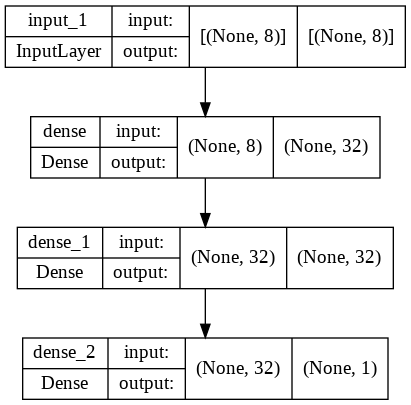

In [54]:
import tensorflow as tf
from tensorflow import keras

keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(8,)))
# keras.layers.Input(shape=(x.shape[1]))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(loss=keras.losses.mse, optimizer=keras.optimizers.Adam(0.001))
# lr이 작아질수록 속도가 느려짐(0.1 > 0.01)

model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [55]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)

In [56]:
model.fit(x, y, validation_split=0.2, callbacks=[es], batch_size=128, verbose=1, epochs=50)

Epoch 1/50
129/129 [==============================] - 1s 3ms/step - loss: 41.5032 - val_loss: 1.8838
Epoch 2/50
129/129 [==============================] - 0s 2ms/step - loss: 1.5091 - val_loss: 1.5555
Epoch 3/50
129/129 [==============================] - 0s 3ms/step - loss: 1.3821 - val_loss: 1.3352
Epoch 4/50
129/129 [==============================] - 0s 2ms/step - loss: 1.4363 - val_loss: 1.2271
Epoch 5/50
129/129 [==============================] - 0s 2ms/step - loss: 2.0693 - val_loss: 1.0915
Epoch 6/50
129/129 [==============================] - 0s 2ms/step - loss: 2.4201 - val_loss: 0.9985
Epoch 7/50
129/129 [==============================] - 0s 2ms/step - loss: 1.5716 - val_loss: 1.0308
Epoch 8/50
129/129 [==============================] - 0s 2ms/step - loss: 0.9914 - val_loss: 1.4608
Epoch 9/50
129/129 [==============================] - 0s 2ms/step - loss: 1.6994 - val_loss: 0.9067
Epoch 10/50
129/129 [==============================] - 0s 2ms/step - loss: 1.3356 - val_loss: 1.212

In [57]:
y_pred = model.predict(x_test)
y_pred[:5].reshape(-1)

array([-0.05983652, -0.05238958, -0.06816423, -0.05208138, -0.05104798],
      dtype=float32)

In [58]:
y_test[:5]

array([4.771, 1.371, 1.233, 0.938, 3.26 ])